<a href="https://colab.research.google.com/github/oceanumeric/ESL/blob/main/ch2/Ch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2 Overview of Supervised Learning

Like the title indicates, this chapter gives the overview of supervised learning. This chapter covers a lot of stuff. I 
understand the authors are trying to give a overview of supervised
learning at the very beginning. However it could be _overwhelming_ 
too. Threrefore, in this notebook, we will illustrate:

* two simple approaches to prediction

Based on this illustration, one should understand:

* what the global method is
* what the local method is

With understanding of those two methods, one should be leaded to 
the famous __Bias-Variance Tradeoff__ by going through:

* statistical decision theory
* and local methods in high dimensions 

Therefore, in this notebook, we will __only__ cover:

* 2.2 Variable Types and Terminology
* 2.3 Two Simple Approaches to Prediction
    * Least Squares
    * Nearest Neighbors 
* 2.4 Statistical Decision Theory
* 2.5 Local Methods in High Dimensions

For other sections in this chapter, we will cover them in the following chapters as chapers 3 to 13 will discuss the following
topics intensively:

* Statistical Models, Supervised Learning and Function Approximation
* Structured Regression Models
* Classes of Restricted Estimators
* Model Selection and the Bias–Variance Tradeoff

The goal of supervised learning is to predict $Y$ given $X$, where $X$ is called
input and $Y$ is called output. One should be aware of variable types:

* continuous variable
* discrete variable
    * categorical
    * ordered categorical 


In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='notebook', style='white')
from ch2_osl import OverviewSL
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_formats = ['svg']

## Two Simple Approaches to Prediction

All examples will be given in a __classification__ context. 

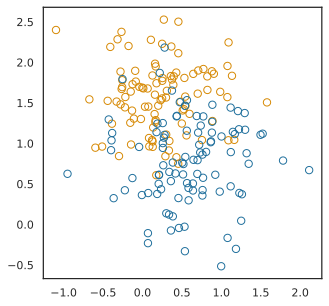

In [220]:
osl = OverviewSL()
osl.plot_data()

The estimated coefficents are [ 0.00959921 -0.20271151  0.48865941]


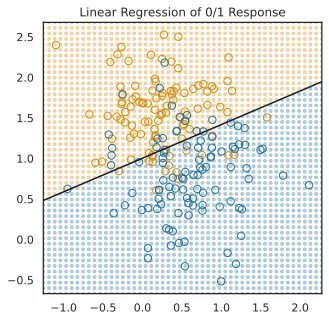

In [219]:
osl.fit_with_linear_model()
osl.plot_linear_model()

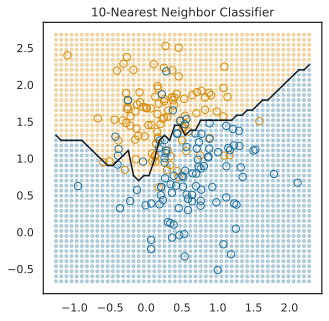

In [221]:
osl.fit_with_nearest_neighbors(k=10, boundary_line=True)

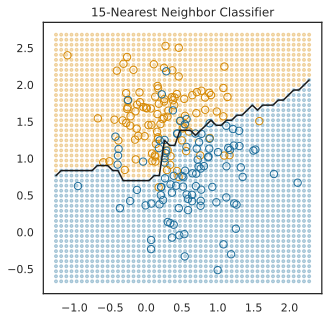

In [222]:
osl.fit_with_nearest_neighbors(k=15, boundary_line=True)

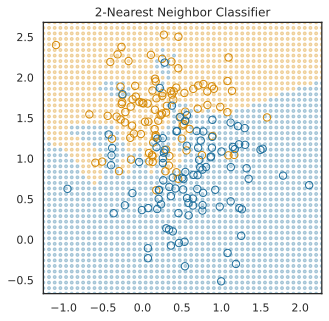

In [223]:
osl.fit_with_nearest_neighbors(k=2)

## From Least Squares to Nearest Neighbors

The linear decision boundary from least squares is very smooth, and apparently
stable to fit. It does appear to rely heavily on the assumption that a 
linear decision boundary is appropriate. In language we will develop shortly, 
it has __low variance and potentially high bias__.

On the other hand, the k-nearest-neighbor procedures do not appear to rely on 
any stringent assumptions about the underlying data, and can adapt to any 
situation. However, any particular subregion of the decision boundary 
depends on a handful of input points and their particular positions, and is 
thus wiggly and unstable-__high variance and low bias__.

<img src="./images/tradeoff.png" style="width: 700px;" alt="tradeoff"/>

## Take Away

A large subset of the most popular techniques in use today are variants of 
these two simple procedures. In fact 1-nearest-neighbor, the simplest of all, 
captures a large percentage of the market for low-dimensional problems. 
The following list describes some ways in which these simple procedures 
have been enhanced:

* Kernel methods use weights that decrease smoothly to zero with distance 
from the target point, rather than the effective 0/1 weights used by 
k-nearest neighbors.
* In high-dimensional spaces the distance kernels are modified to emphasize 
some variable more than others.
* Local regression fits linear models by locally weighted least squares, rather
than fitting constants locally.
* Linear models fit to a basis expansion of the original inputs allow 
arbitrarily complex models.
* Projection pursuit and neural network models consist of sums of 
nonlinearly transformed linear models.

## Statistical Decision Theory

A criterion for choosing $f$,

$\begin{aligned} \operatorname{EPE}(f) &=\int[y-f(x)]^{2} \operatorname{Pr}(d x, d y) \\ &=\int[y-f(x)]^{2} p(x, y) d x d y \\ &=\int_{x} \int_{y}[y-f(x)]^{2} p(x, y) d x d y \\ &=\int_{x} \int_{y}[y-f(x)]^{2} p(x) p(y \mid x) d x d y \\ &=\int_{x}\left(\int_{y}[y-f(x)]^{2} p(y \mid x) d y\right) p(x) d x \\ &=\int_{x}\left(E_{Y \mid X}\left([Y-f(X)]^{2} \mid X=x\right)\right) p(x) d x \\ &=E_{X} E_{Y \mid X}\left([Y-f(X)]^{2} \mid X=x\right) \end{aligned}$

To minize the above function, we have

$$f(x) = E(Y|X = x)$$

Therefore, it is __all about conditional mean__.

The nearest-neighbor methods attempt to directly implement this recipe using 
the training data. At each point $x$, we might ask for the average of all
those $y_i$s with input $x_i = x$. Since there is typically at most one observation 
at any point $x$, we settle for

$$
\hat{f}(x)=\operatorname{Ave}\left(y_{i} \mid x_{i} \in N_{k}(x)\right)
$$

where "Ave" denotes average, and $N_{k}(x)$ is the neighborhood containing the 
$k$ points in $\mathrm{T}$ closest to $x$. Two approximations are happening here:

- expectation is approximated by averaging over sample data;
- conditioning at a point is relaxed to conditioning on some region "close" to 
the target point.

The linear regression is to assume

$$f(x) = X^T\beta$$

Now, we need to find $\beta$ that minize $EPE(f)$. The matrix calculus could 
give us the following solution

$$\beta = (X'X)^{-1}X'Y$$

So both k-nearest neighbors and least squares end up approximating 
conditional expectations by averages. But they differ dramatically in terms 
of model assumptions:

* Least squares assumes $f(x)$ is well approximated by a globally linear function.
* $k$-nearest neighbors assumes $f(x)$ is well approximated by a locally constant function.

What do we do when the output is a __categorical variable__ $G$? The same paradigm 
works here, except we need a different loss function for penalizing prediction 
errors. An estimate $\hat{G}$ will assume values in $\mathcal{G}$, the set of
possible classes. Our loss function can be represented by a $K \times K$ matrix 
$\mathbf{L}$, where $K=\operatorname{card}(\mathcal{G}) . \mathbf{L}$ will be 
zero on the diagonal and nonnegative elsewhere, where $L(k, \ell)$ is the price 
paid for classifying an observation belonging to class $\mathcal{G}_{k}$ as 
$\mathcal{G}_{\ell}$. Most often we use the _zero-one_ loss function, where all 
misclassifications are charged a single unit. The expected prediction error is
$$
\mathrm{EPE}=\mathrm{E}[L(G, \hat{G}(X))]
$$
where again the expectation is taken with respect to the __joint distribution__ 
$\operatorname{Pr}(G, X)$. Again we condition, and can write EPE as
$$
\mathrm{EPE}=\mathrm{E}_{X} \sum_{k=1}^{K} L\left[\mathcal{G}_{k}, \hat{G}(X)\right] \operatorname{Pr}\left(\mathcal{G}_{k} \mid X\right)
$$

and again it suffices to minimize EPE pointwise:
$$
\hat{G}(x)=\operatorname{argmin}_{g \in \mathcal{G}} \sum_{k=1}^{K} L\left(\mathcal{G}_{k}, g\right) \operatorname{Pr}\left(\mathcal{G}_{k} \mid X=x\right)
$$
With the 0-1 loss function this simplifies to
$$
\hat{G}(x)=\operatorname{argmin}_{g \in \mathcal{G}}[1-\operatorname{Pr}(g \mid X=x)]
$$
or simply
$$
\hat{G}(X)=\mathcal{G}_{k} \text { if } \operatorname{Pr}\left(\mathcal{G}_{k} \mid X=x\right)=\max _{g \in \mathcal{G}} \operatorname{Pr}(g \mid X=x)
$$
This reasonable solution is known as the Bayes classifier, and says that we 
classify to the __most probable class__ (meaning: choose those with the 
highest probabilities), using the __conditional (discrete) 
distribution__ $\operatorname{Pr}(G \mid X)$. 

How could we find $\max _{g \in \mathcal{G}} \operatorname{Pr}(g \mid X=x)$?
We use the Bayes rule:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

In our case, we have the simulation with 10 means, $m_{1}, \ldots, m_{10}$, are 
generated for each class (Blue and Orange) from distributions,
$$
\mathcal{N}\left(\left[\begin{array}{l}
1 \\
0
\end{array}\right], I_{2}\right) \quad \text { and } \quad \mathcal{N}\left(\left[\begin{array}{l}
0 \\
1
\end{array}\right], I_{2}\right)
$$
respectively. Then 100 observations are drawn from each class by choosing a 
mean, $m_{k}$, from the 10 corresponding to its class, uniformly at 
random and then generating a point from the distribution, 
$\mathcal{N}\left(m_{k}, I_{2} / 5\right)$. Now fix an arbitrary data point, 
$x$. Using Bayes theorem, we have
$$
\mathbb{P}(\text { Orange } \mid x)=\frac{\mathbb{P}(x \mid \text { Orange }) \mathbb{P}(\text { Orange })}{\mathbb{P}(x)}
$$
The classes Blue and Orange occur with equal frequency so 
$\mathbb{P}($ Blue $)=\mathbb{P}($ Orange $)=$ $1 / 2$:

$\begin{aligned} P(\text { blue }) &=P \text { (orange) } \\ \sum_{i} \frac{1}{\sqrt{|2 \pi \Sigma|}} \exp \left(-\frac{1}{2}\left(\mathbf{x}-\mathbf{p}_{i}\right)^{T} \boldsymbol{\Sigma}^{-1}\left(\mathbf{x}-\mathbf{p}_{i}\right)\right) &=\sum_{j} \frac{1}{\sqrt{|2 \pi \Sigma|}} \exp \left(-\frac{1}{2}\left(\mathbf{x}-\mathbf{q}_{j}\right)^{T} \boldsymbol{\Sigma}^{-1}\left(\mathbf{x}-\mathbf{q}_{j}\right)\right) \\ \sum_{i} \exp \left(-\frac{1}{2}\left(\mathbf{x}-\mathbf{p}_{i}\right)^{T} \boldsymbol{\Sigma}^{-1}\left(\mathbf{x}-\mathbf{p}_{i}\right)\right) &=\sum_{j} \exp \left(-\frac{1}{2}\left(\mathbf{x}-\mathbf{q}_{j}\right)^{T} \boldsymbol{\Sigma}^{-1}\left(\mathbf{x}-\mathbf{q}_{j}\right)\right) \\ \sum_{i} \exp \left(-\frac{1}{2}\left(\mathbf{x}-\mathbf{p}_{i}\right)^{T}\left(\frac{5}{\mathbf{I}_{2}}\right)\left(\mathbf{x}-\mathbf{p}_{i}\right)\right) &=\sum_{j} \exp \left(-\frac{1}{2}\left(\mathbf{x}-\mathbf{q}_{j}\right)^{T}\left(\frac{5}{\mathbf{I}_{2}}\right)\left(\mathbf{x}-\mathbf{q}_{j}\right)\right) \\ \sum_{i} \exp \left(\frac{-5\left\|\mathbf{p}_{i}-\mathbf{x}\right\|^{2}}{2}\right) &=\sum_{j} \exp \left(\frac{-5\left\|\mathbf{q}_{j}-\mathbf{x}\right\|^{2}}{2}\right) \end{aligned}$

At this point, $\mathbb{P}(x \mid$ Orange $)$ is not directly computable due 
to the unobserved mean on which they depend. But we can further expand these 
probabilities to make this dependence explicit. Note that we have three 
latent variables at work here: $k, m_{k}$, and color.
$$
\begin{aligned}
\mathbb{P}(x \mid \text { Orange }) &=\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \sum_{k=1}^{10} \mathbb{P}\left(x, m_{k}, k \mid \text { Orange }\right) d m_{k} \\
&=\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \sum_{k=1}^{10} \mathbb{P}\left(x \mid m_{k}, k, \text { Orange }\right) \mathbb{P}\left(m_{k} \mid k, \text { Orange }\right) \mathbb{P}(k \mid \text { Orange }) d m_{k} \\
&=\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \sum_{k=1}^{10}\left[\left(\frac{5}{2 \pi} \exp \left\{-\frac{5}{2}\left(x-m_{k}\right)^{T}\left(x-m_{k}\right)\right\}\right) \times\right.\\
&\left.\left(\frac{1}{2 \pi} \exp \left\{-\frac{1}{2}\left(m_{k}-\left[\begin{array}{l}
0 \\
1
\end{array}\right]\right)^{T}\left(m_{k}-\left[\begin{array}{l}
0 \\
1
\end{array}\right]\right)\right\}\right)\right]\left(\frac{1}{10}\right) d m_{k} \\
&=\int_{-\infty}^{\infty} \int_{-\infty}^{\infty}\left[\left(\frac{5}{2 \pi} \exp \left\{-\frac{5}{2}\left(x-m_{k}\right)^{T}\left(x-m_{k}\right)\right\}\right) \times\right.\\
&\left.\left(\frac{1}{2 \pi} \exp \left\{-\frac{1}{2}\left(m_{k}-\left[\begin{array}{l}
0 \\
1
\end{array}\right]\right)^{T}\left(m_{k}-\left[\begin{array}{l}
0 \\
1
\end{array}\right]\right)\right\}\right)\right] d m_{k}
\end{aligned}
$$
Then the boundary is found by setting $\mathbb{P}(x \mid$ Orange $)=1 / 2$ and 
solving for $x$.

__Remark__: in this case the data was simulated, whereas in practice we estimate
$\mathbb{P}(x \mid \text { Orange })$ with training dataset and substitue it 
into the prediction function for the testing dataset. Feel free to review
[_multivariate normal distribution_](https://en.wikipedia.org/wiki/Multivariate_normal_distribution).

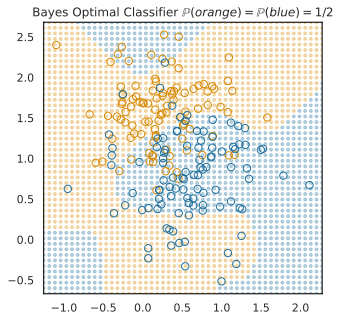

In [224]:
osl.bayes_classifier()

## Local Methods in High Dimensions

We have examined two learning techniques for prediction so far: the stable
but biased linear model and the less stable but apparently less biased class
of k-nearest-neighbor estimates. It would seem that with a reasonably large
set of training data, we could always approximate the theoretically optimal
conditional expectation by k-nearest-neighbor averaging, since we should
be able to find a fairly large neighborhood of observations close to any x
and average them. This approach and our intuition breaks down in high
dimensions, and the phenomenon is commonly referred to as the __curse
of dimensionality__ (Bellman, 1961).

__Warning__: This is a hard topic but it is worth understanding it. 

### How sparse it can go when dimension grows

We will generate a dataset randomly for:

* one dimension: $x \in N(0, 3)$
* two dimension: $X \in N(0, \Sigma)$, where $\Sigma  = \begin{bmatrix} 3 &  0 \\ 0 &  3 \end{bmatrix}$

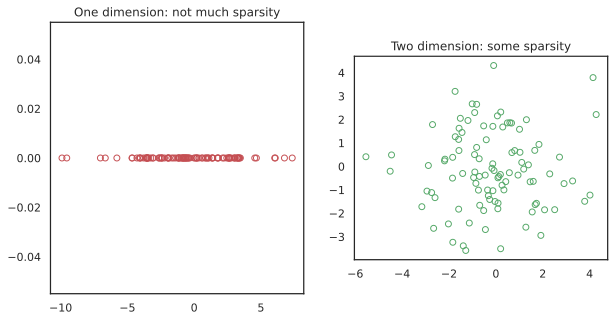

In [205]:
osl = OverviewSL()
osl.plot_sparsity()

The above figure illustrates our data is more sparse in the higher dimension
_when the sample size is same ($n=100$ in this case)_. The other side of the
same coin is that the sampling density is alwasy small in high dimensions. Let's
define the sampling denstiy as the approximate number of points on each line
of lenght one. For example in 1d sampling density of 5 looks like this: 

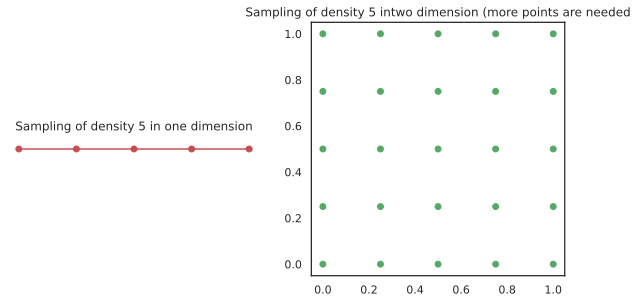

In [206]:
osl.plot_denstity_example()

### Volume of neighborhood

In __three__ dimension, the volume of cube with unit length $r$ is:

$$V(r) = r^3$$

In the $p$-dimension, the volume __hypercube__ with unit lenght $r$ is:

$$V(r) = r^p$$

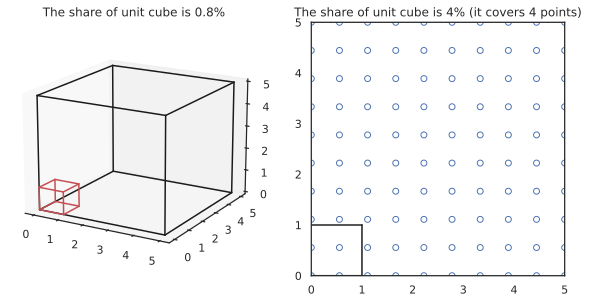

In [207]:
osl.plot_cube()

Now, assume that we have 1000 points that are uniformly distributed in the
hypercube of $p$-dimenson. Suppose we want to make predictions around the original
point $[0, 0, \cdots, 0]$, we need to create a cubic neighborhood around
this point to capture the fraction of $r$ of the observations.

In our case $r=1/100$, so that we have $1000/100=10$ points in the cube (cube
in the high dimension) to have reasonaable averaging like we did in
k-nearest-neighborhood. What is the __edge-length__ of this cube in $p$-dimension?

It is: 

$$e_p(r) = r^{1/p}$$

Because the volume of this neighborhood is $r$ when the sample is uniformly 
distributed ($(r^{1/p})^p = r$). 

In ten dimensions $e_{10}(0.01)=$ $0.63$ and $e_{10}(0.1)=0.80$, while the entire range for each input is only 1.0. So to capture $1 \%$ or $10 \%$ of the data 
to form a local average, we must cover $63 \%$ or $80 \%$ of the range of 
each input variable. Such neighborhoods are no longer "local." Reducing 
the fraction of sample $r$ dramatically does not help much either, 
since the fewer observations we average, the higher is the 
variance of our fit.

| sample covered | edge-length                             |
|----------------|-----------------------------------------|
| 1%             | 63% of the range of each input variable |
| 10%            | 80% of the range of each input variable |
| 20%            | 85%                                     |

__Remark__: curse of dimensionality


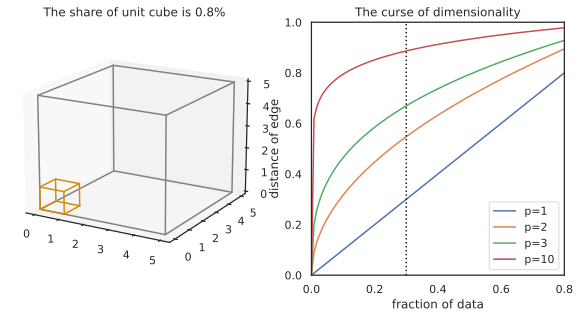

In [208]:
osl.plot_dimension_curse()

The above figure shows that to get a fraction of data, the edge we need to cover
grows exponetially. This means that __local methods__ like k-nearest-neighborhood
is not working __locally__. Or you can also understand another way around. 

Take for example a hypercube with side length equal to 1 , in an $p$-dimensional 
space. The volume of the hypercube ist 1 . If we want to allocate that volume 
among $N$ smaller cubes (each containing a data point) distributed more or 
less homogeneously in the p-dimensional hypercube, each small cube will 
have a volume equal to $1 / N$. Their side length $d$ would be
$$
d=\left(\frac{1}{N}\right)^{(1 / p)}
$$
For a finite $N, d$ converges to 1 when $p$ goes to infinity(as it shows
in the above figure). That is, __the new smaller cubes have each "almost" the 
same volume as the bigger cube__, which means every cube is the same cube or
all local cubes become the same one. 

### A Concrete Example

Suppose we have 1000 training examples $x_i$ generated uniformly on $[−1, 1]^p$ . Assume that the true relationship between X and Y is

$$Y=f(X) = e^{-8||X||^2}$$

without any measurement error. We use the 1-nearest-neighbor rule to predict $y_0$ at the test-point $x_0 = 0$.

$$
\begin{aligned}
 \text{MSE}(x_0) & = E_\tau[f(x_0) - \hat{y_0}]^2\\
 & = E_\tau[(f(x_0) - E_\tau(\hat{y_0})) + (E_\tau(\hat{y_0}) - \hat{y_0})]^2\\
 & = E_\tau[(E_\tau(\hat{y_0}) - \hat{y_0})^2  + 2(f(x_0) - E_\tau(\hat{y_0}))(E_\tau(\hat{y_0}) - \hat{y_0})+ (f(x_0) - E_\tau(\hat{y_0}))^2]\\
 & = E_\tau[(E_\tau(\hat{y_0}) - \hat{y_0})^2] + E_\tau[(E_\tau(\hat{y_0}) - f(x_0))^2]\\
 & = E_\tau[\hat{y_0} - E_\tau(\hat{y_0})]^2 + [E_\tau(\hat{y_0}) - f(x_0)]^2\\
 & = Var_\tau(\hat{y_0}) + Bias^2(\hat{y_0})
\end{aligned}
$$


We have broken down the MSE into two components that will become familiar as we proceed: variance and squared bias. Such a decomposition is always possible and often useful, and is known as the __bias–variance decomposition__.

    The expected prediction error = variance of estimation + bias

he variance term measures the variability of our estimate based on
the sample data. The squared bias term measures how far the expected value of our estimator is from the truth.


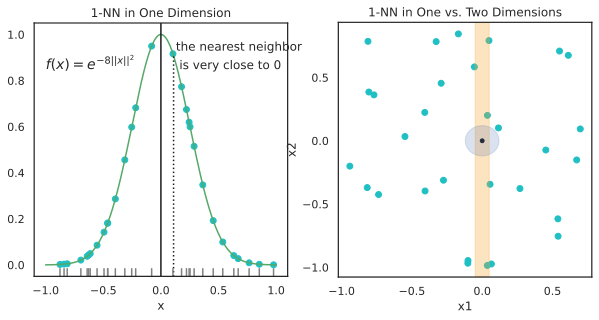

In [212]:
np.random.seed(777)
osl.plot_simulated_data_2_7_1()

Based on the above figure, the bias is very small for $p=1$ (dimension = 1), however the bias increases quickly with dimension because the distance to the nearest neighbor increases. 

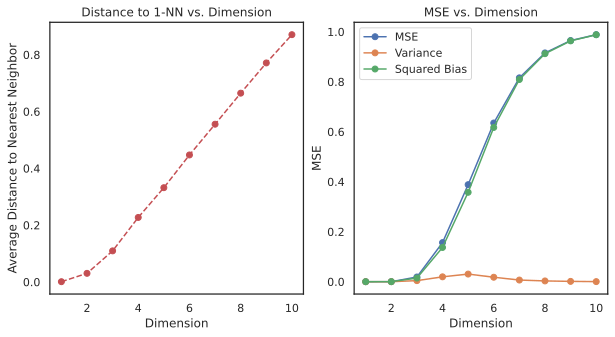

In [56]:
np.random.seed(789)
osl.plot_simulated_data_2_7_2()

By $p = 10$, for more than 99% of the samples the nearest neighbor is a distance greater than 0.5 from the origin. Thus as p increases, the estimate tends to be 0 more often than not, and hence the MSE levels off at 1.0, as does the bias, and the variance starts dropping (an artifact of this example). 

Therefore, __k-nearest-neighborhood has high bias for the high dimension data__.

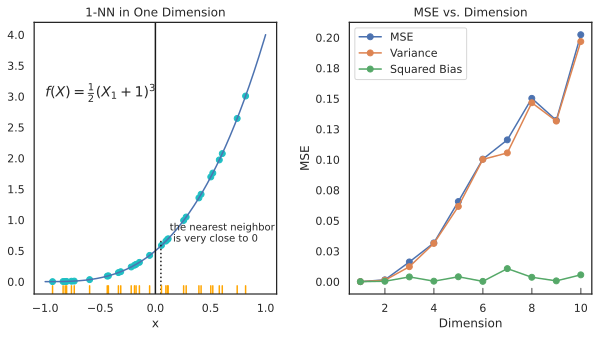

In [15]:
np.random.seed(999)
osl = OverviewSL()
osl.plot_simulated_data_2_8()

The dependence of the bias term on distance depends on the truth, and it need not 
always dominate with 1-nearest neighbor. For example, if the function always 
involves only a few dimensions as in the above figure, then the variance can dominate instead.

__Take Away__:

* assume a truth function $Y=f(X)$, we generate the dataset
* by estimating $Y$ with k-nearest-neighborhood method, we showed:
    - local methods do not work well in high dimensions
    - bias could be either domianted by squared bias or variance


__Linear Regression in High Dimensions__ 

Assume that the relationship between X and Y is: 

$$Y = f(X) =  X\beta + \varepsilon$$ 

where $\varepsilon \sim N(0, \sigma^2)$. The above model is also called
 __population model__ as we assume it is ture for all. 
 The matrix $X$ has $N \times p$ dimension, where $n$ is the sample size 
 and $p$ is the dimension. 

 we fit the model by __least squares__ to the training data. For a test 
 point $x_0$ we have $\hat{y_0}=x_0\hat{\beta}$ which can be written 
 as $\hat{y_0} = x_0\beta + \sum_{i=1}^N {l_i(x_0)\varepsilon_i}$ where 
 $l_i(x_0)$ is the $i$th element of $\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}x_0$

Proof:

The method of OLS estimation chooses the values for $\beta_{1}, \beta_{2}, \ldots, \beta_{k}$, denoted $\hat{\beta}_{1}, \hat{\beta}_{2}, \ldots, \hat{\beta}_{k}$, that minimize the residuals sum of squares :
$$
R S S=\sum_{t=1}^{T} \hat{u}_{t}^{2}
$$
In matrix form this translates to:
$$
\text { choose } \hat{\beta} \text { to minimize } R S S=\hat{u}^{\prime} \hat{u}
$$
where $\hat{u}=y-X \hat{\beta}$. Now,
$$
\begin{aligned}
R S S &=\hat{u}^{\prime} \hat{u}=(y-X \hat{\beta})^{\prime}(y-X \hat{\beta}) \\
&=\left(y^{\prime}-\hat{\beta}^{\prime} X^{\prime}\right)(y-X \hat{\beta}) \\
&=y^{\prime} y-y^{\prime} X \hat{\beta}-\hat{\beta}^{\prime} X^{\prime} y+\hat{\beta}^{\prime} X^{\prime} X \hat{\beta} \\
&=y^{\prime} y-2 y^{\prime} X \hat{\beta}+\hat{\beta}^{\prime} X^{\prime} X \hat{\beta}
\end{aligned}
$$
where the last line follows because $\hat{\beta}^{\prime} X^{\prime} y$ is a scalar and hence equal to $\left(\hat{\beta}^{\prime} X^{\prime} y\right)^{\prime}=$ $y^{\prime} X \hat{\beta}$
The first order conditions for minimizing $R S S$ is:
$$
\frac{\partial R S S}{\partial \hat{\beta}}=0,
$$
and to obtain this $k$ dimensional vector of partial derivatives we will require the following two results from the appendix
$$
\frac{\partial A b}{\partial b}=A^{\prime} \quad ; \quad \frac{\partial b^{\prime} A b}{\partial b}=2 A b,
$$
so that
$$
\frac{\partial R S S}{\partial \hat{\beta}}=-2 X^{\prime} y+2 X^{\prime} X \hat{\beta}
$$
Equating to 0 gives
$$
X^{\prime} X \hat{\beta}=X^{\prime} y,
$$
and solving yields the OLS estimator
$$
\hat{\beta}=\left(X^{\prime} X\right)^{-1} X^{\prime} y .
$$
Note that $\left(X^{\prime} X\right)^{-1}$ must exist given the assumption that $X$ has full column rank $k$. Also, note that second order conditions for a minimum are satisfied:
$$
\frac{\partial^{2} R S S}{\partial \hat{\beta} \partial \hat{\beta}^{\prime}}=2 X^{\prime} X>0 \text { (i.e. is a positive definite matrix) }
$$
We call $\hat{y}=X \hat{\beta}$ the fitted values from the estimated regression.

There are a number of properties associated with the OLS estimator. First, a useful expression relating $\hat{\beta}$ and $\beta$ can be derived:
$$
\begin{aligned}
\hat{\beta} &=\left(X^{\prime} X\right)^{-1} X^{\prime} y=\left(X^{\prime} X\right)^{-1} X^{\prime}(X \beta+u) \\
&=\left(X^{\prime} X\right)^{-1} X^{\prime} X \beta+\left(X^{\prime} X\right)^{-1} X^{\prime} u \\
&=\beta+\left(X^{\prime} X\right)^{-1} X^{\prime} u
\end{aligned}
$$


$$
\begin{aligned}
E(\hat{\beta}) &=E\left[\beta+\left(X^{\prime} X\right)^{-1} X^{\prime} u\right]=\beta+E\left[\left(X^{\prime} X\right)^{-1} X^{\prime} u\right] \\
&=\beta+\left(X^{\prime} X\right)^{-1} X^{\prime} E[u]=\beta
\end{aligned}
$$
as $E[u]=0$. When $E[\hat{\beta}]=\beta$ we say that $\hat{\beta}$ is an unbiased estimator of $\beta$.


$$
\begin{aligned}
V(\hat{\beta}) &=E\left[(\hat{\beta}-\beta)(\hat{\beta}-\beta)^{\prime}\right] \\
&=E\left[\left(X^{\prime} X\right)^{-1} X^{\prime} u\left(\left(X^{\prime} X\right)^{-1} X^{\prime} u\right)^{\prime}\right] \\
&=E\left[\left(X^{\prime} X\right)^{-1} X^{\prime} u u^{\prime} X\left(X^{\prime} X\right)^{-1}\right]=\left(X^{\prime} X\right)^{-1} X^{\prime} E\left[u u^{\prime}\right] X\left(X^{\prime} X\right)^{-1} \\
&=\left(X^{\prime} X\right)^{-1} X^{\prime}\left(\sigma^{2} I_{T}\right) X\left(X^{\prime} X\right)^{-1}=\sigma^{2}\left(X^{\prime} X\right)^{-1} X^{\prime} X\left(X^{\prime} X\right)^{-1} \\
&=\sigma^{2}\left(X^{\prime} X\right)^{-1}
\end{aligned}
$$
If we wished to estimate the variance of $\hat{\beta}$, we need to estimate $\sigma^{2}$.

Under this model the least square estimates are unbiased, so the expected prediction error will be:
$$
\begin{aligned}
\text{EPE}(x_0) & = E_{y_0|x_0}E_\tau(y_0-\hat{y_0})^2\\
& = \text{Var}(y_0|x_0) + Var_\tau(\hat{y_0}) + \text{Bias}^2(\hat{y_0})\\
& = \sigma^2 + E_{\tau}x_0^T(\mathbf{X}^T\mathbf{X})^{-1}x_0\sigma^2 + 0^2
\end{aligned}
$$

*Proof*:
$$
\begin{aligned}
\text{EPE}(x_0) & = E_{y_0|x_0}E_\tau(y_0-\hat{y_0})^2\\
& = E_{y_0|x_0}E_\tau((y_0 - f(x_0)) + (f(x_0) - \hat{y_0}))^2\\
& = E_{y_0|x_0}E_\tau(y_0 - f(x_0))^2 + 2E_{y_0|x_0}E_\tau(y_0 - f(x_0))(f(x_0) - \hat{y_0}) + E_{y_0|x_0}E_\tau(f(x_0) - \hat{y_0})^2\\
& = U_1 + U_2 + U_3
\end{aligned}
$$

There are three components $U_1$, $U_2$, $U_3$ and we're going to expand them as well. 

$U_1 = E_{y_0|x_0}E_\tau(y_0 - f(x_0))^2 = E_{y_0|x_0}(y_0-f(x_0))^2 = \sigma^2$ 

*Note*: $E_\tau f(x_0) = E_\tau (x_0\beta + \varepsilon) =  E_{y_0|x_0}(y_0) $ becuase $x_0$ is chosen randomly


$U_2 = 2E_{y_0|x_0}E_\tau(y_0 - f(x_0))(f(x_0) - \hat{y_0}) = 0$ 

*Note*: $E_{y_0|x_0}(y_0-f(x_0)) = 0$


*$U_3$*:

$$
\begin{aligned}
U_3 & = E_{y_0|x_0}E_\tau(f(x_0) - \hat{y_0})^2\\
& = E_{y_0|x_0}E_\tau((\hat{y_0} - E_\tau(\hat{y_0})) + (E_\tau(\hat{y_0}) - f(x_0)))^2\\
& = E_{y_0|x_0}E_\tau(\hat{y_0} - E_\tau(\hat{y_0}))^2 + 2E_{y_0|x_0}E_\tau[(\hat{y_0} - E_\tau(\hat{y_0}))(E_\tau(\hat{y_0}) - f(x_0))] + E_{y_0|x_0}E_\tau(E_\tau(\hat{y_0}) - f(x_0))^2\\
& = E_\tau(\hat{y_0} - E_\tau(\hat{y_0}))^2 + (E_\tau(\hat{y_0}) - f(x_0))^2\\
& = \text{Var}_\tau(\hat{y_0}) + \text{Bias}_\tau^2(\hat{y_0}) 
\end{aligned}
$$

Finally if we sum all $U_i$ we get: $$\text{EPE}(x_0) = U_1+U_2+U_3 = \sigma^2 + 0 + (\text{Var}_\tau(\hat{y_0}) + \text{Bias}_\tau^2(\hat{y_0}))$$

$E_\tau(\hat{y_0}) = E_\tau(x_0^T\beta + \sum_{i=1}^N {l_i(x_0)\varepsilon_i})=x_0^T\beta + E(\sum_{i=1}^N {l_i(x_0)\varepsilon_i}) = x_0^T\beta + 0$ thus $\text{Bias}_\tau{\hat{y_0}} = 0$ 


we have already shown:
$$\hat{\beta}=\beta + (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\varepsilon$$

we can find variance:
$$
\begin{aligned}
\text{Var}_\tau(\hat{y_0}) & = E_\tau(\hat{y_0} - E_\tau(\hat{y_0})) ^ 2\\
& = E_\tau ( x_0 \hat{\beta} - E_\tau(x_0 \hat{\beta})) \\
& = E_\tau (x_0 \beta + x_0^T(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\varepsilon - E_\tau(x_0 \beta)- E_\tau (x_0^T(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\varepsilon)) \\
& = E_\tau(x_0^T(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\varepsilon)\\
& = E_\tau(x_0^T(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\varepsilon\varepsilon^T\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}x_0)
\end{aligned}
$$

where $\varepsilon\varepsilon^T=\sigma^2\mathbf{I}_n$, so we can simplify further:
$$\text{Var}_\tau(\hat{y_0}) = \sigma^2x_0^{T}E_\tau[(\mathbf{X}^T\mathbf{X})^{-1})]x_0$$

if N is large and $\tau$ were selected at random, and assuming E(X) = 0, then $\mathbf{X}^T\mathbf{X}$->$NCov(\mathbf{X})$.

*Proof*: By definition of covariance $\text{Cov}(X) = E[(X-E(X))(X-E(X))^T] = E(XX^T) = \frac{\mathbf{X}^T\mathbf{X}}{N}$

and we can derive that:
$$
\begin{aligned}
E_{x_0}\text{EPE}(x_0) & = \text{Var}_\tau(\hat{y_0})  + \sigma^2 \\
& = E_{x_0}x_0^{T}\text{Cov}^{-1}(X)x_0\sigma^2/N+\sigma^2\\
& = \text{trace}[\text{Cov}^{-1}(X)\text{Cov}(x_0)]\sigma^2/N+\sigma^2\\
& = \sigma^2(p/N)+\sigma^2
\end{aligned}
$$


## References

1. [Expected prediction error](https://stats.stackexchange.com/questions/92180/expected-prediction-error-derivation)